In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to One-Hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\H\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3556 - loss: 1.7398 - val_accuracy: 0.5325 - val_loss: 1.2828
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5629 - loss: 1.2188 - val_accuracy: 0.6087 - val_loss: 1.0996
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6314 - loss: 1.0455 - val_accuracy: 0.6214 - val_loss: 1.0859
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6688 - loss: 0.9391 - val_accuracy: 0.6596 - val_loss: 0.9821
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.6956 - loss: 0.8704 - val_accuracy: 0.6694 - val_loss: 0.9514
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7197 - loss: 0.7989 - val_accuracy: 0.6797 - val_loss: 0.9294
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7387 - loss: 0.7480 - val_accuracy: 0.6944 - val_loss: 0.8902
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7558 -

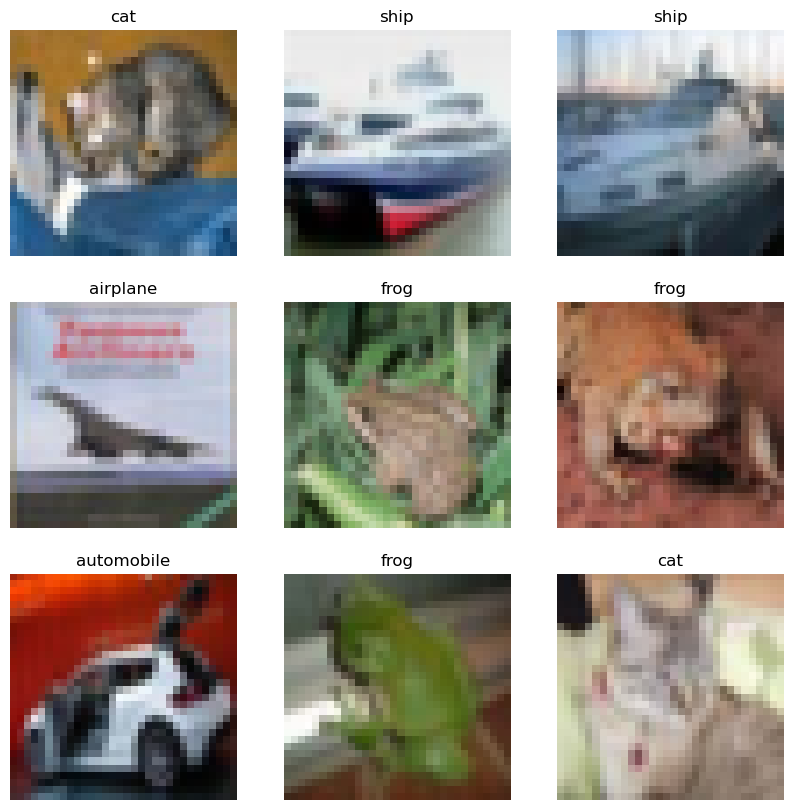

In [3]:
import matplotlib.pyplot as plt

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display some images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title(class_names[y_test[i].argmax()])
    plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


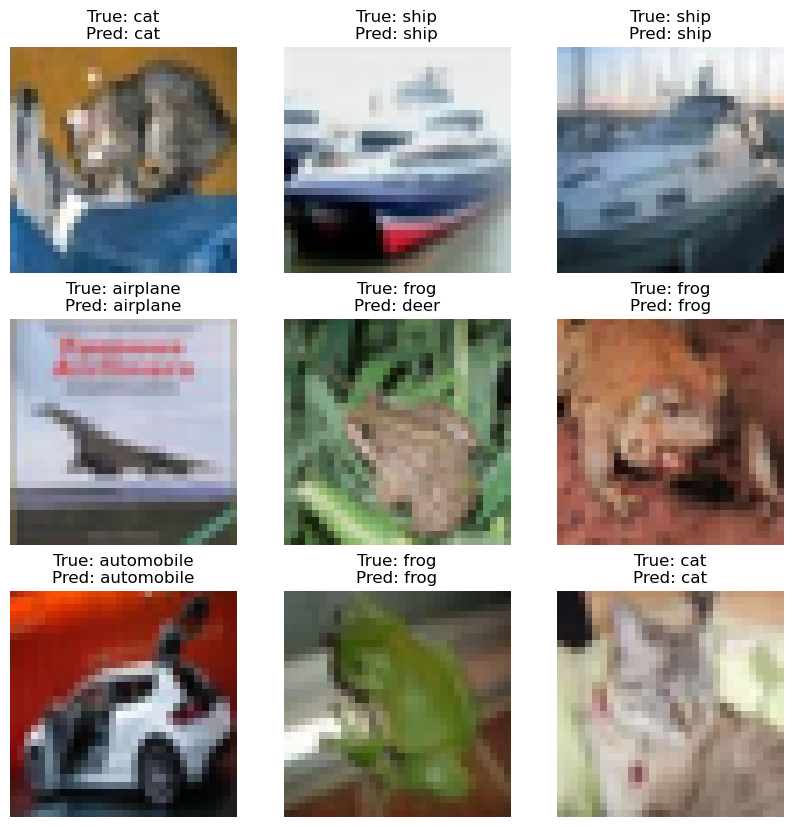

In [10]:
# Display predictions for some images
predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i].argmax()]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')
plt.show()


In [9]:
from tensorflow.keras.preprocessing import image

# Load an image
img_path =r"C:\Users\H\Downloads\horse1.jpg"
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the image
prediction = model.predict(img_array)
predicted_label = class_names[np.argmax(prediction)]

print(f'Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: horse
